In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics  import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, roc_curve, auc,roc_auc_score;

In [2]:
pd.set_option('display.max_columns', None)

# Busca as bases de treino e teste
df_train_smote = pd.read_csv('/content/drive/MyDrive/Bases Projetos/2 - Acidentes rodoviária federal - Brasil/train_smote.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Federal-road-accidents---Brazil/main/3%20-%20Preprocessing/train_encoder.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Federal-road-accidents---Brazil/main/3%20-%20Preprocessing/test_encoder.csv')

Devido ao tamanha do arquivo de treino com oversampling ele ficará disponivel via Google Drive, pode ser acessado via https://drive.google.com/file/d/1e752rs0m0TtbauWc9HEw57Bwd5BSPHYV/view?usp=sharing ou replicando o passo a passo que realizei neste projeto.

In [3]:
x_train = df_train.drop(['obitos'], axis = 1)
y_train = df_train['obitos']

x_test = df_test.drop(['obitos'], axis = 1)
y_test = df_test['obitos']

In [4]:
print('Base de treino')
print(f'Número de observações: {x_train.shape[0]}')
print(f'Número de variaveis: {x_train.shape[1]}')
print('')
print('Proporção da variavel resposta/target')
print(f'Acidentes sem vitimas fatais (não evento): {y_train.value_counts()[0]}')
print(f'Acidentes com vitimas fatais (evento): {y_train.value_counts()[1]}')

Base de treino
Número de observações: 147640
Número de variaveis: 25

Proporção da variavel resposta/target
Acidentes sem vitimas fatais (não evento): 136974
Acidentes com vitimas fatais (evento): 10666


# Select Features

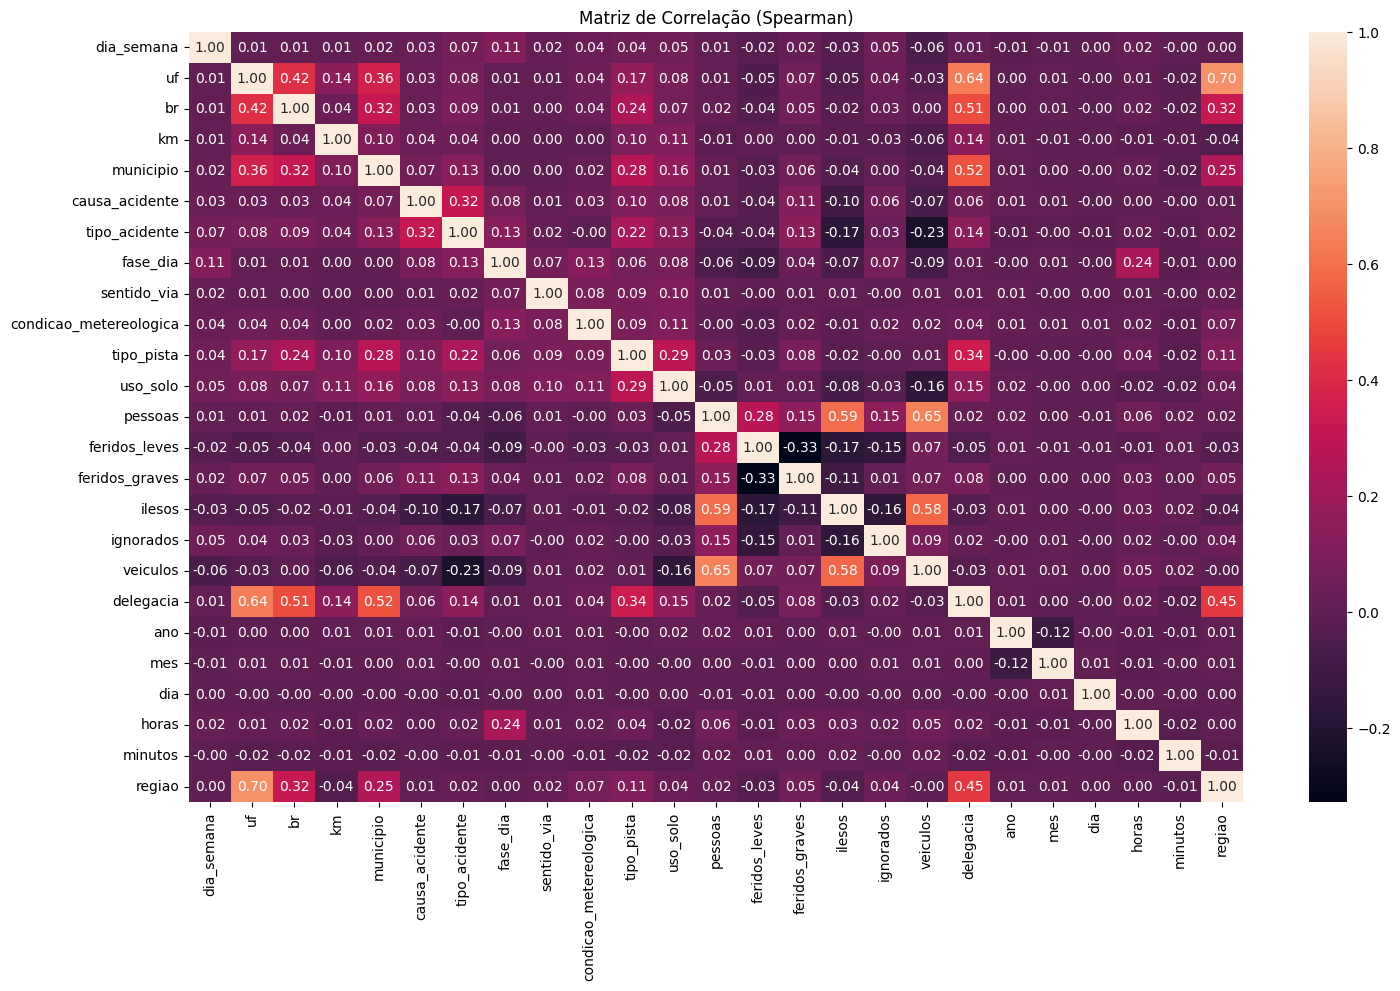

In [5]:
# Correlação por Spearman
matriz = x_train.corr(method = 'spearman')
plt.figure(figsize = (17,10))
sns.heatmap(matriz, annot = True, fmt = '.2f')
plt.title('Matriz de Correlação (Spearman)')
plt.show()

In [6]:
# Aplicando o SelectKBest e seus parametros
k_best = SelectKBest(f_classif, k = 16)
k_best.fit(x_train, y_train)
x_train_kbest = k_best.transform(x_train)
x_test_kbest = k_best.transform(x_test)

# Features escolhidas pelo SelectKBest
df_selected_features = pd.DataFrame({'Feature': x_train.columns, 'SelectKBest': k_best.get_support()})
print(df_selected_features)

                   Feature  SelectKBest
0               dia_semana        False
1                       uf         True
2                       br         True
3                       km         True
4                municipio         True
5           causa_acidente         True
6            tipo_acidente         True
7                 fase_dia         True
8              sentido_via        False
9   condicao_metereologica        False
10              tipo_pista         True
11                uso_solo         True
12                 pessoas         True
13           feridos_leves         True
14          feridos_graves         True
15                  ilesos        False
16               ignorados         True
17                veiculos         True
18               delegacia         True
19                     ano        False
20                     mes        False
21                     dia        False
22                   horas        False
23                 minutos        False


# Modelos


## Random Forest (Selectkbest)

In [7]:
y_train.value_counts()

0    136974
1     10666
Name: obitos, dtype: int64

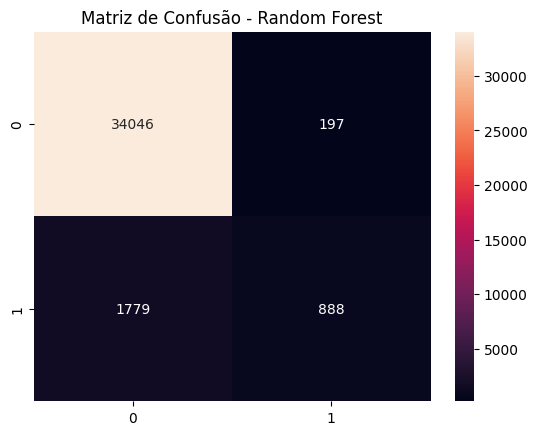

Acurácia: 0.95
Precisão: 0.82
Recall: 0.33
F1-score: 0.47


In [8]:
# Criação do Random Forest com o SelectKbest
model_random = RandomForestClassifier(n_estimators= 100, random_state = 1337)
model_random.fit(x_train_kbest,y_train)
random_predict = model_random.predict(x_test_kbest)

# Availiação do modelo
sns.heatmap(confusion_matrix(y_test, random_predict), annot = True, fmt = 'g')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

accuracy = accuracy_score(y_test, random_predict)
precision = precision_score(y_test, random_predict)
recall = recall_score(y_test, random_predict)
f1 = f1_score(y_test, random_predict)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

## K-Nearest Neighbors (KNN)

In [9]:
# Criação do K-Nearest Neighbors com o SelectKbest
model_knn = KNeighborsClassifier(metric = 'minkowski',  n_neighbors = 3)
model_knn.fit(x_train_kbest, y_train)
knn_predict = model_knn.predict(x_test_kbest)

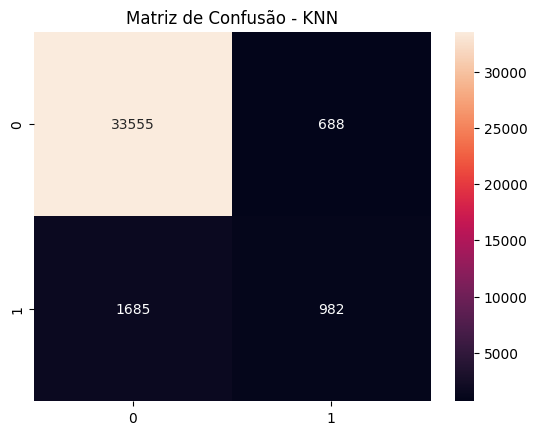

Acurácia: 0.94
Precisão: 0.59
Recall: 0.37
F1-score: 0.45


In [10]:
sns.heatmap(confusion_matrix(y_test,knn_predict), annot = True, fmt = 'g')
plt.title("Matriz de Confusão - KNN")
plt.show()

accuracy = accuracy_score(y_test, knn_predict)
precision = precision_score(y_test, knn_predict)
recall = recall_score(y_test, knn_predict)
f1 = f1_score(y_test, knn_predict)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

## Regressão Logistica

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


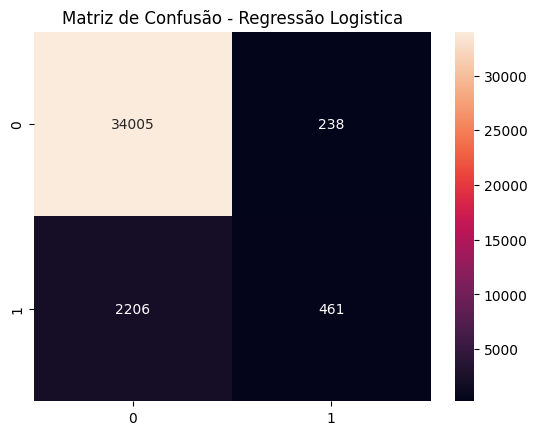

Acurácia: 0.93
Precisão: 0.66
Recall: 0.17
F1-score: 0.27


In [11]:
# Criando o modelo LogisticRegression usando Selectkbest
model_log = LogisticRegression(random_state= 1337 ) # penalty='l1')
model_log.fit(x_train_kbest,y_train)
log_predict = model_log.predict(x_test_kbest)

# Avaliando o modelo de LogisticRegression
sns.heatmap(confusion_matrix(y_test,log_predict), annot = True, fmt = 'g')
plt.title("Matriz de Confusão - Regressão Logistica")
plt.show()

accuracy = accuracy_score(y_test, log_predict)
precision = precision_score(y_test, log_predict)
recall = recall_score(y_test, log_predict)
f1 = f1_score(y_test, log_predict)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

## Gradient Boosting Classifier

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
model_gb = GradientBoostingClassifier(n_estimators = 100 , random_state = 1337, max_depth = 8, learning_rate = 0.1)
model_gb.fit(x_train_kbest, y_train)
gb_predict= model_gb.predict(x_test_kbest)

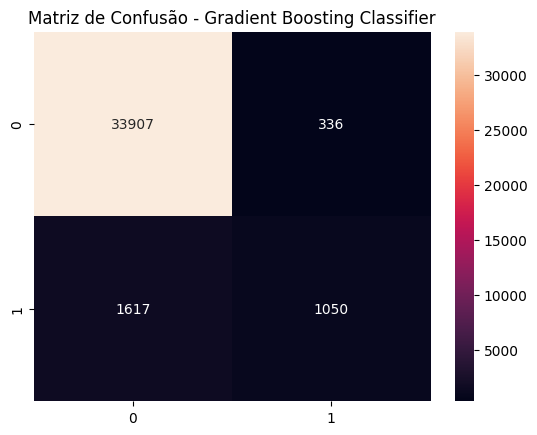

Acurácia: 0.95
Precisão: 0.76
Recall: 0.39
F1-score: 0.52


In [14]:
# Avaliando o modelo de Gradient Boosting Classifier
sns.heatmap(confusion_matrix(y_test,gb_predict), annot = True, fmt = 'g')
plt.title("Matriz de Confusão - Gradient Boosting Classifier")
plt.show()

accuracy = accuracy_score(y_test, gb_predict)
precision = precision_score(y_test, gb_predict)
recall = recall_score(y_test, gb_predict)
f1 = f1_score(y_test, gb_predict)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

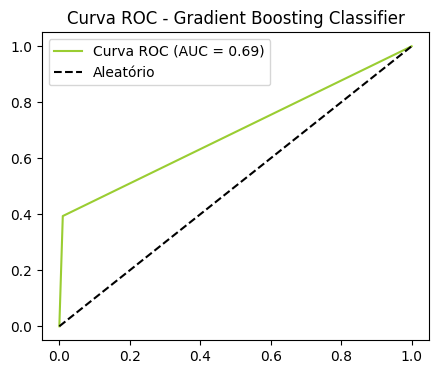

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, gb_predict)

# Calculando a AUC
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='yellowgreen',  label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black',  linestyle='--', label='Aleatório')
plt.title('Curva ROC - Gradient Boosting Classifier')
plt.legend()
plt.show()

# Modelos com Oversampling

## Random Forest

In [19]:
x_train_smote = df_train_smote.drop('obitos', axis = 1)
y_train_smote = df_train_smote['obitos']

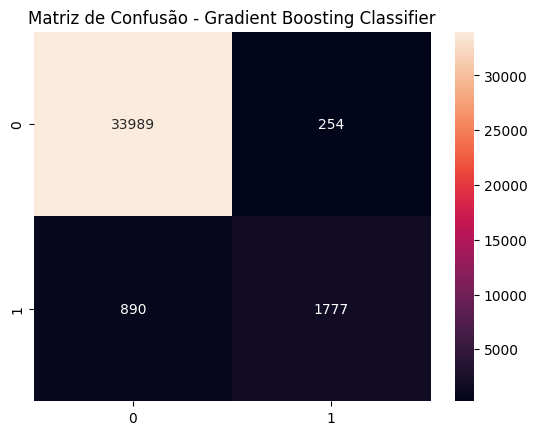

Acurácia: 0.97
Precisão: 0.87
Recall: 0.67
F1-score: 0.76


In [21]:
# Criando RandomForestClassifier com base de oversampling
model_random_smt = RandomForestClassifier(n_estimators= 200, random_state = 1337)
model_random_smt.fit(x_train_smote,y_train_smote)
random_smt_predict = model_random_smt.predict(x_test)

# Avaliando o modelo de Gradient Boosting Classifier
sns.heatmap(confusion_matrix(y_test,random_smt_predict), annot = True, fmt = 'g')
plt.title("Matriz de Confusão - Gradient Boosting Classifier")
plt.show()

accuracy = accuracy_score(y_test, random_smt_predict)
precision = precision_score(y_test, random_smt_predict)
recall = recall_score(y_test, random_smt_predict)
f1 = f1_score(y_test, random_smt_predict)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

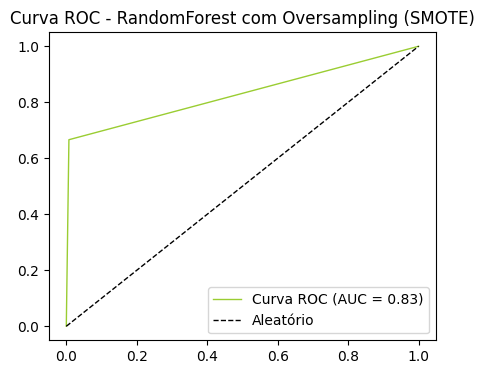

In [32]:
# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, random_smt_predict)

# Calculando a AUC
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='yellowgreen', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Aleatório')
plt.title('Curva ROC - RandomForest com Oversampling (SMOTE)')
plt.legend()
plt.show()

## KNN

In [40]:
model_knn_smt = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
model_knn_smt.fit(x_train_smote,y_train_smote)
knn_smt_predict = model_knn_smt.predict(x_test)

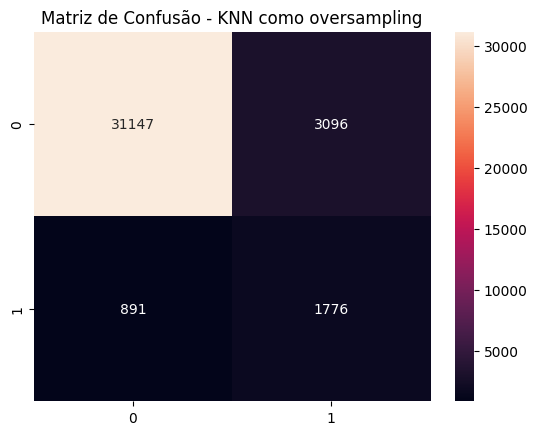

Acurácia: 0.89
Precisão: 0.36
Recall: 0.67
F1-score: 0.47


In [41]:
# Avaliando o modelo de K-Nearest Neighbors (KNN) como oversampling
sns.heatmap(confusion_matrix(y_test,knn_smt_predict), annot = True, fmt = 'g')
plt.title("Matriz de Confusão - KNN como oversampling")
plt.show()

accuracy = accuracy_score(y_test, knn_smt_predict)
precision = precision_score(y_test, knn_smt_predict)
recall = recall_score(y_test, knn_smt_predict)
f1 = f1_score(y_test, knn_smt_predict)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')